In [1]:
import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

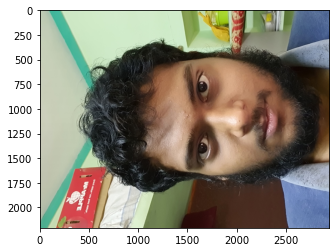

In [2]:
img = image.load_img('C:/Object Detection using CNN/baseData/Training/Kamalesh/20210505_112959.jpg')
plt.imshow(img)

In [3]:
cv2.imread('C:/Object Detection using CNN/baseData/Training/Kamalesh/20210505_112959.jpg').shape

(2944, 2208, 3)

In [4]:
cv2.imread('C:/Object Detection using CNN/baseData/Training/Kamalesh/20210505_112959.jpg')

array([[[143, 172,  79],
        [142, 171,  78],
        [143, 172,  79],
        ...,
        [184, 204, 192],
        [183, 203, 191],
        [184, 204, 192]],

       [[143, 172,  79],
        [142, 171,  78],
        [143, 172,  79],
        ...,
        [183, 203, 191],
        [183, 203, 191],
        [183, 203, 191]],

       [[143, 172,  79],
        [142, 171,  78],
        [143, 172,  79],
        ...,
        [184, 204, 192],
        [183, 203, 191],
        [183, 203, 191]],

       ...,

       [[170, 114,  89],
        [168, 112,  87],
        [164, 108,  83],
        ...,
        [144, 100,  76],
        [150, 106,  82],
        [150, 106,  82]],

       [[171, 115,  90],
        [170, 114,  89],
        [166, 110,  85],
        ...,
        [147, 103,  79],
        [153, 109,  85],
        [152, 108,  84]],

       [[175, 119,  94],
        [173, 117,  92],
        [168, 112,  87],
        ...,
        [149, 105,  81],
        [154, 110,  86],
        [154, 110,  86]]

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('C:/Object Detection using CNN/baseData/Training',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

validation_dataset = train.flow_from_directory('C:/Object Detection using CNN/baseData/Vaidation',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'Kamalesh': 0, 'KaviArasan': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
validation_dataset.class_indices

{'Kamalesh': 0, 'KaviArasan': 1}

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    
                                    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    
                                    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(units=512, activation='relu'),
                                    tf.keras.layers.Dense(units=1, activation='sigmoid')])

In [11]:
# import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='rmsprop',
              metrics=['accuracy'],
              loss='binary_crossentropy')

In [12]:
model.fit(train_dataset,
          steps_per_epoch=3,
          epochs=30,
          validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 5s 2s/step - loss: 4.5440 - accuracy: 0.5556 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 1.2120 - accuracy: 0.5714 - val_loss: 0.6569 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 0.7111 - accuracy: 0.5714 - val_loss: 0.6461 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 0.6687 - accuracy: 0.4444 - val_loss: 0.6256 - val_accuracy: 0.6000
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 0.7861 - accuracy: 0.5556 - val_loss: 0.6425 - val_accuracy: 0.8000
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 0.6335 - accuracy: 0.7143 - val_loss: 0.6321 - val_accuracy: 0.7000
Epoch 7/30
3/3 [==============================] - 4s 2s/step - loss: 0.6077 - accuracy: 0.6667 - val_loss: 0.5848 - val_accuracy: 0.6000
Epoch 8/30
3/3 [=========================

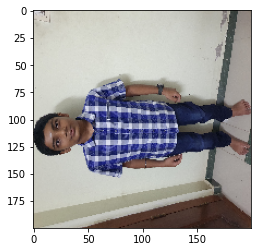

Kavi Arasan


In [24]:
img = image.load_img('C:/Object Detection using CNN/baseData/Testing/20210701_000150.jpg',
                                          target_size=(200,200,3)
                                        #   batch_size=3,
                                        #   class_mode='binary'
                                          )
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
# x = np.expand_dims(x,axis=0)
images = np.vstack([[x]])
val = model.predict(images)

if val == 0:
    print('Kamalesh')

else:
    print('Kavi Arasan')

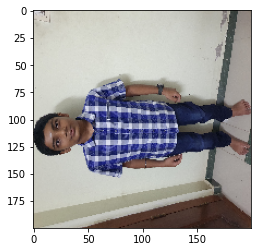

Kavi Arasan


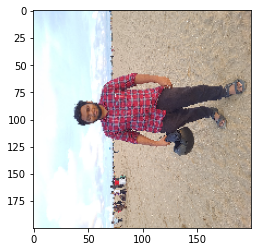

Kamalesh


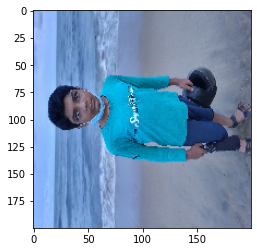

Kavi Arasan


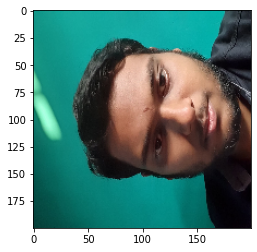

Kamalesh


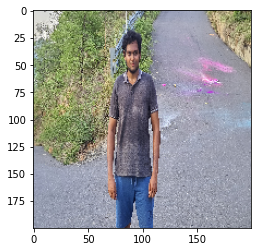

Kavi Arasan


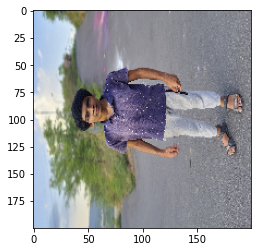

Kavi Arasan


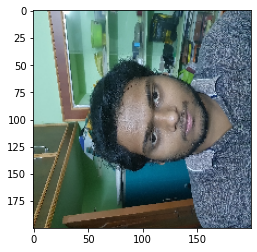

Kamalesh


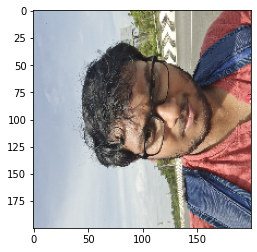

Kamalesh


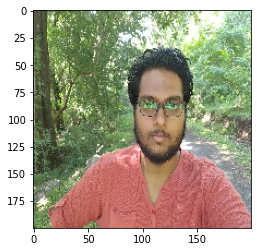

Kavi Arasan


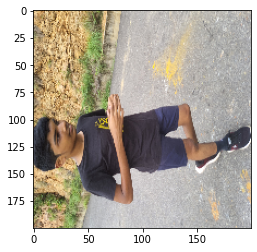

Kamalesh


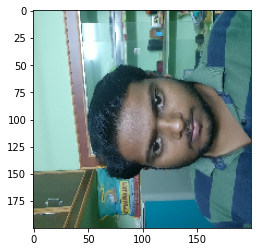

Kamalesh


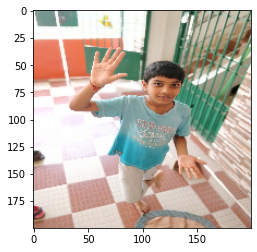

Kavi Arasan


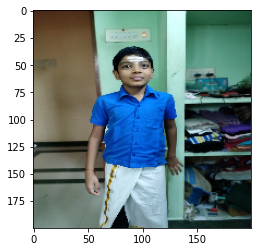

Kavi Arasan


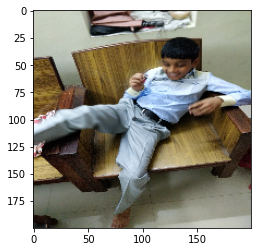

Kavi Arasan


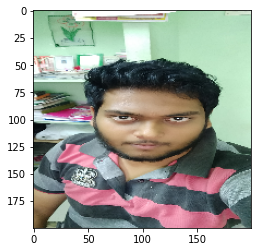

Kamalesh


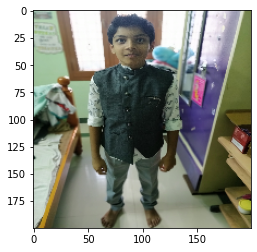

Kavi Arasan


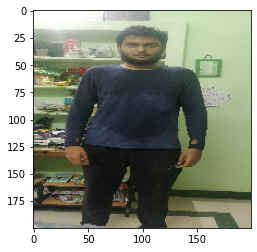

Kamalesh


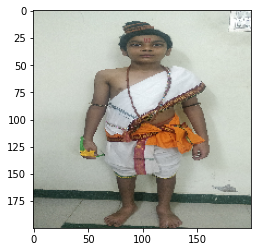

Kavi Arasan


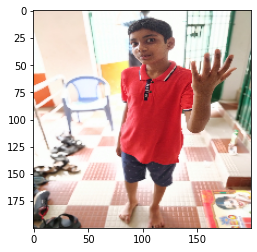

Kavi Arasan


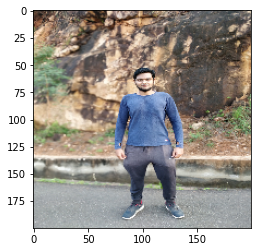

Kavi Arasan


In [25]:
test_dir = r'C:\Object Detection using CNN\baseData\Testing'

for i in os.listdir(test_dir):
    img = image.load_img(test_dir + '//' + i, target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    # x = np.expand_dims(x,axis=0)
    images = np.vstack([[x]])
    val = model.predict(images)

    if val == 0:
        print('Kamalesh')

    else:
        print('Kavi Arasan')